# 타이타닉 생존자 예측

- 데이터 : ../data/titanic.xls

- 컬럼의 의미

	<img src="https://github.com/ElaYJ/supplement/assets/153154981/91ff2969-675d-41fc-b14f-8538bcc118ff" width="50%" height="50%">

## ⏹ EDA (데이터 탐색적 분석)

In [1]:
# <참고> pip install --upgrade pip

#!pip install plotly_express

In [2]:
import pandas as pd

titanic_url = "https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/titanic.xls"

titanic = pd.read_excel(titanic_url)
titanic

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


### 🔰 생존 상황

2


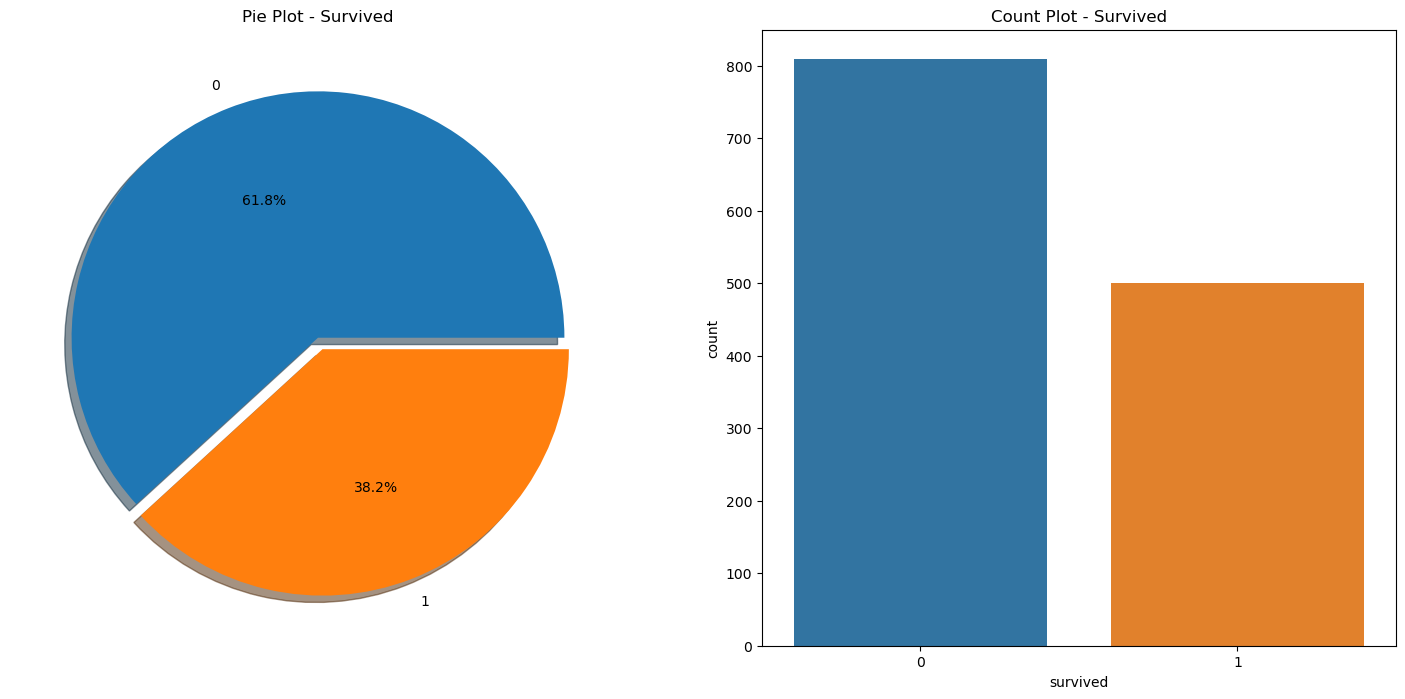

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

f, ax = plt.subplots(1, 2, figsize=(18,8)) #--> 1 Row(행), 2 Column(열)
print(len(ax)) #--> 내가 요청한 그래프 개수, ax는 그래프의 특성임.

titanic['survived'].value_counts().plot.pie(ax=ax[0], autopct='%1.1f%%',shadow=True, explode=[0, 0.05]);
ax[0].set_title('Pie Plot - Survived')
ax[0].set_ylabel('')

sns.countplot(x='survived', data=titanic, ax=ax[1], hue='survived', legend=False);
ax[1].set_title('Count Plot - Survived')

plt.show()


### 🔰 성별에 따른 생존 상황

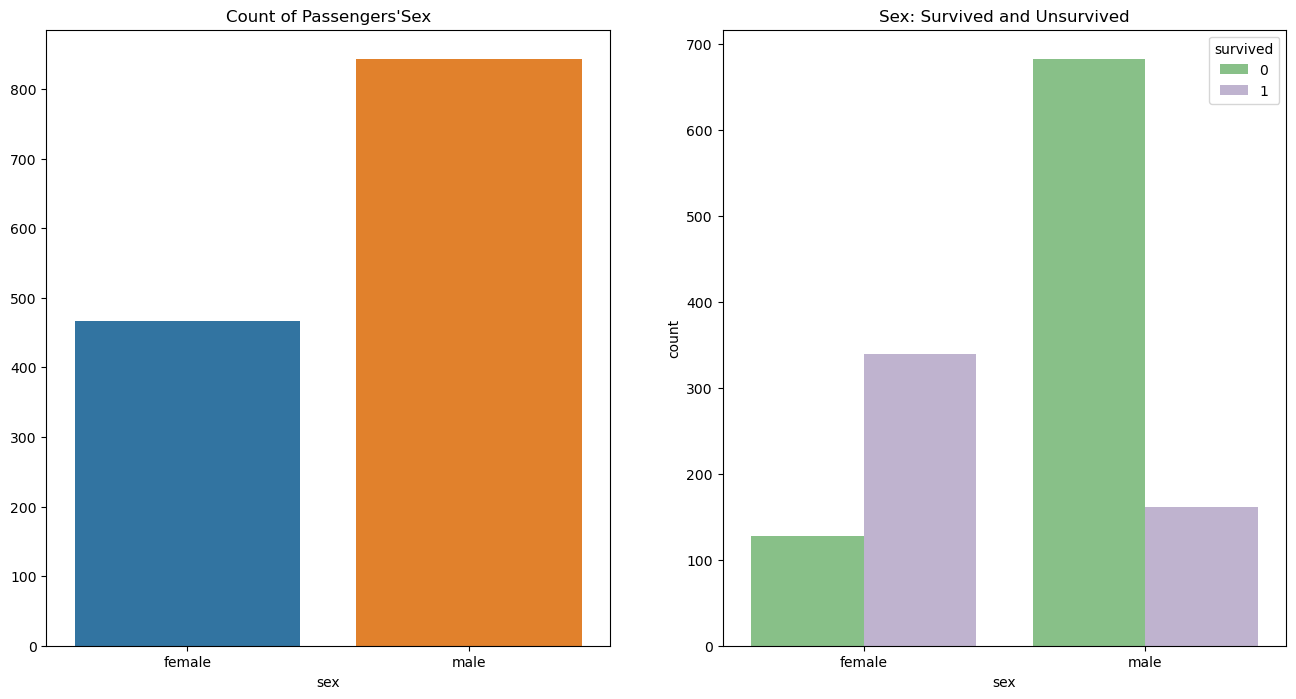

In [17]:
f, ax = plt.subplots(1, 2, figsize=(16, 8))

sns.countplot(x='sex', data=titanic, ax=ax[0], hue='sex', legend=False)
ax[0].set_title("Count of Passengers\'Sex")
ax[0].set_ylabel('')

sns.countplot(x='sex', data=titanic, ax=ax[1], hue='survived', palette='Accent')
ax[1].set_title("Sex: Survived and Unsurvived")

plt.show()

👉 남성의 생존 가능성이 더 낮다.

- 여성 탑승객의 대략 2개의 남성 탑승객이 있다.

- 남성은 여성에 비해 4배 정도 많이 생존하지 못했다.

- 여성은 남성 탑승객 수의 2배 정도 생존했다.

➡ 여성 탑승객 수가 훨씬 작은대도 남성 승객보다 더 많이 생존했다. 

### 🔰 경쟁력 대비 생존률

In [18]:
pd.crosstab(titanic['pclass'], titanic['survived'], margins=True)

survived,0,1,All
pclass,,,
1,123,200,323
2,158,119,277
3,528,181,709
All,809,500,1309


In [26]:
pclass_df = pd.crosstab(titanic['pclass'], titanic['survived'], margins=True)
# pclass_df.columns.tolist(), pclass_df.index.tolist() --> ([0, 1, 'All'], [1, 2, 3, 'All'])

pclass_df['survival%'] = round((pclass_df[1]/pclass_df['All'])*100, 0)
pclass_df

survived,0,1,All,survival%
pclass,,,,
1,123,200,323,62.0
2,158,119,277,43.0
3,528,181,709,26.0
All,809,500,1309,38.0


👉 1등실의 생존 가능성이 아주 높다.

- 여성의 생존률이 아주 높았는데 그러면 1등실에 여성이 많이 타고 있었을까???

### 🔰 선실 등급별 성별 상황

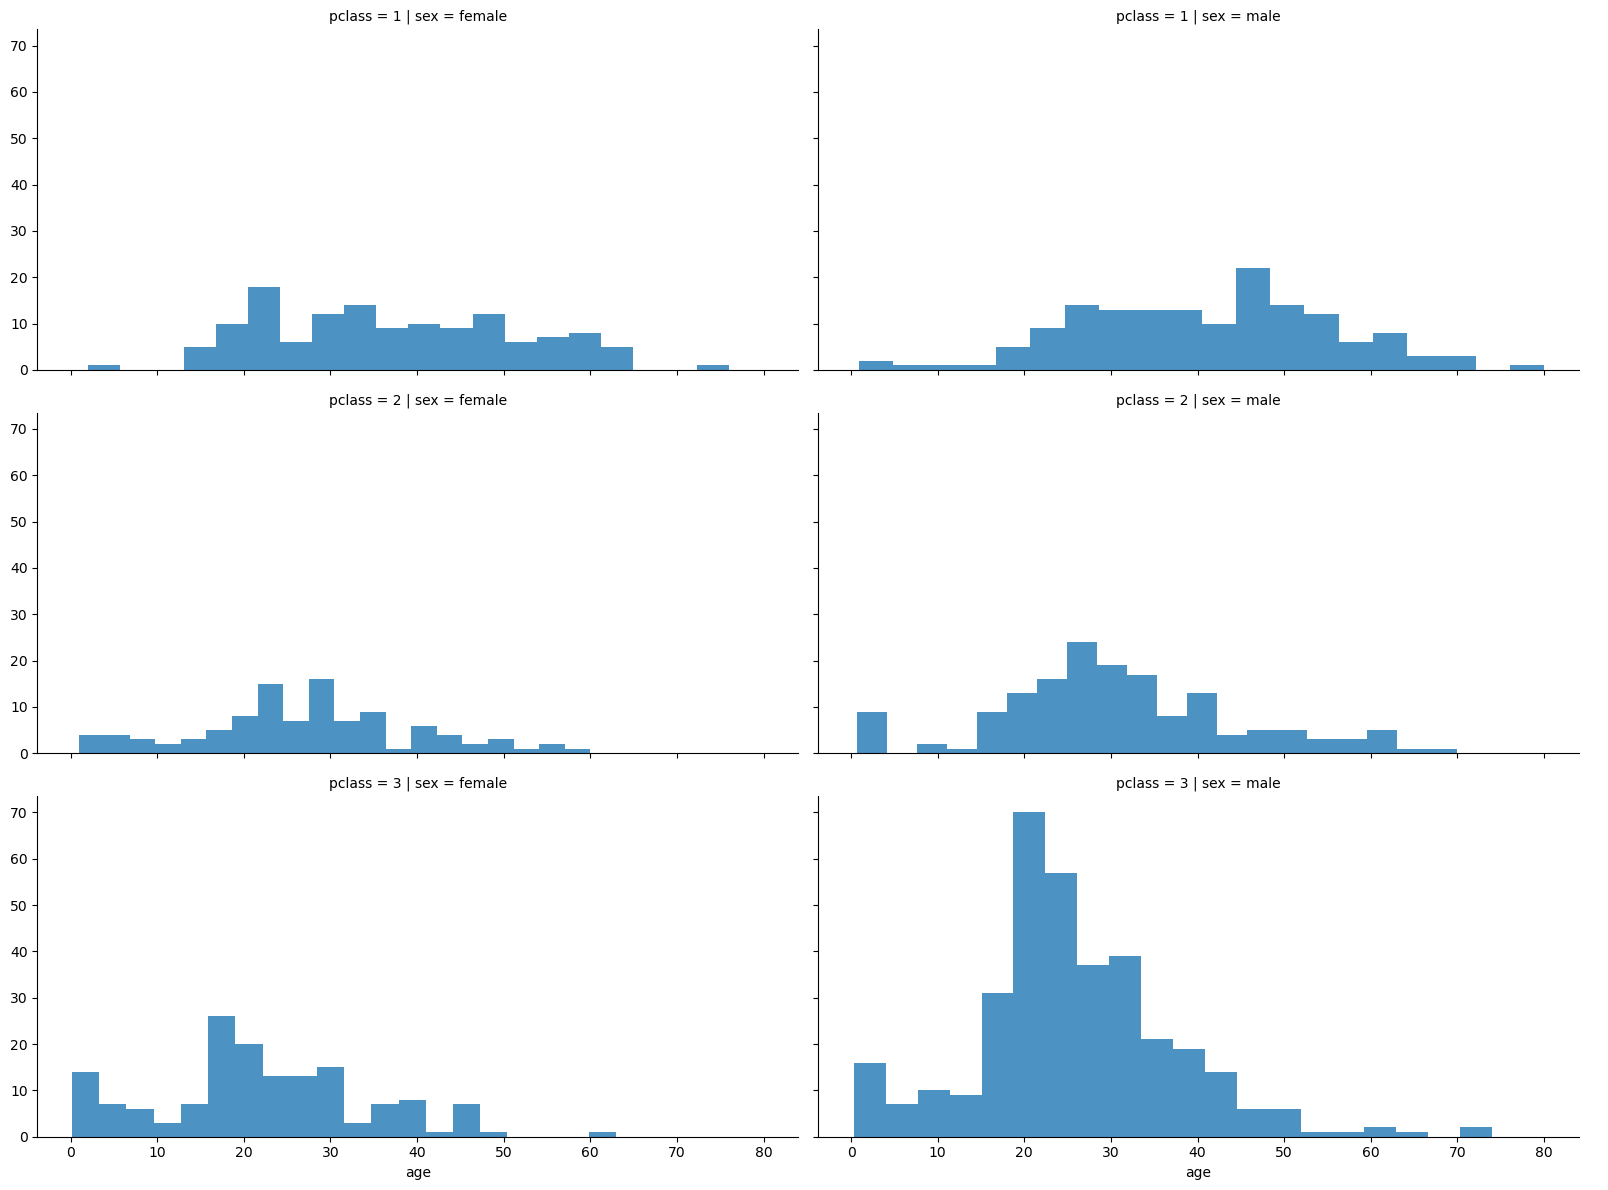

In [29]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

grid = sns.FacetGrid(titanic, row='pclass', col='sex', height=4, aspect=2)
grid.map(plt.hist, 'age', alpha=.8, bins=20) #--> 나이별 히스토그램을 맵핑
grid.add_legend();

👉 3등실에서 남성이 많았다. 특히 20대 남성

- 3등실에는 10대 중반부터 30대 중반까지의 남성이 굉장히 많았다.

- 3등실 남성들의 생존률의 굉장히 낮아서 전체적인 여성들의 생존률이 높아 보였을 것이고,

- 더불어 1등실, 2등실의 생존률도 높아 보이게 한 것일 수 있다.

### 🔰 나이별 승객 현황

In [30]:
import plotly.express as px

fig = px.histogram(titanic, x='age')
fig.show()

<img src="./image/titanic_age.png">

👉 아이들과 20~30대가 많았다.

- 0세부터 10세의 아이들과 18세부터 30대까지의 탑승객 수가 많았다.

- 70대와 80대 노인도 있었다.

### 🔰 등실별 생존률을 연령별로 관찰

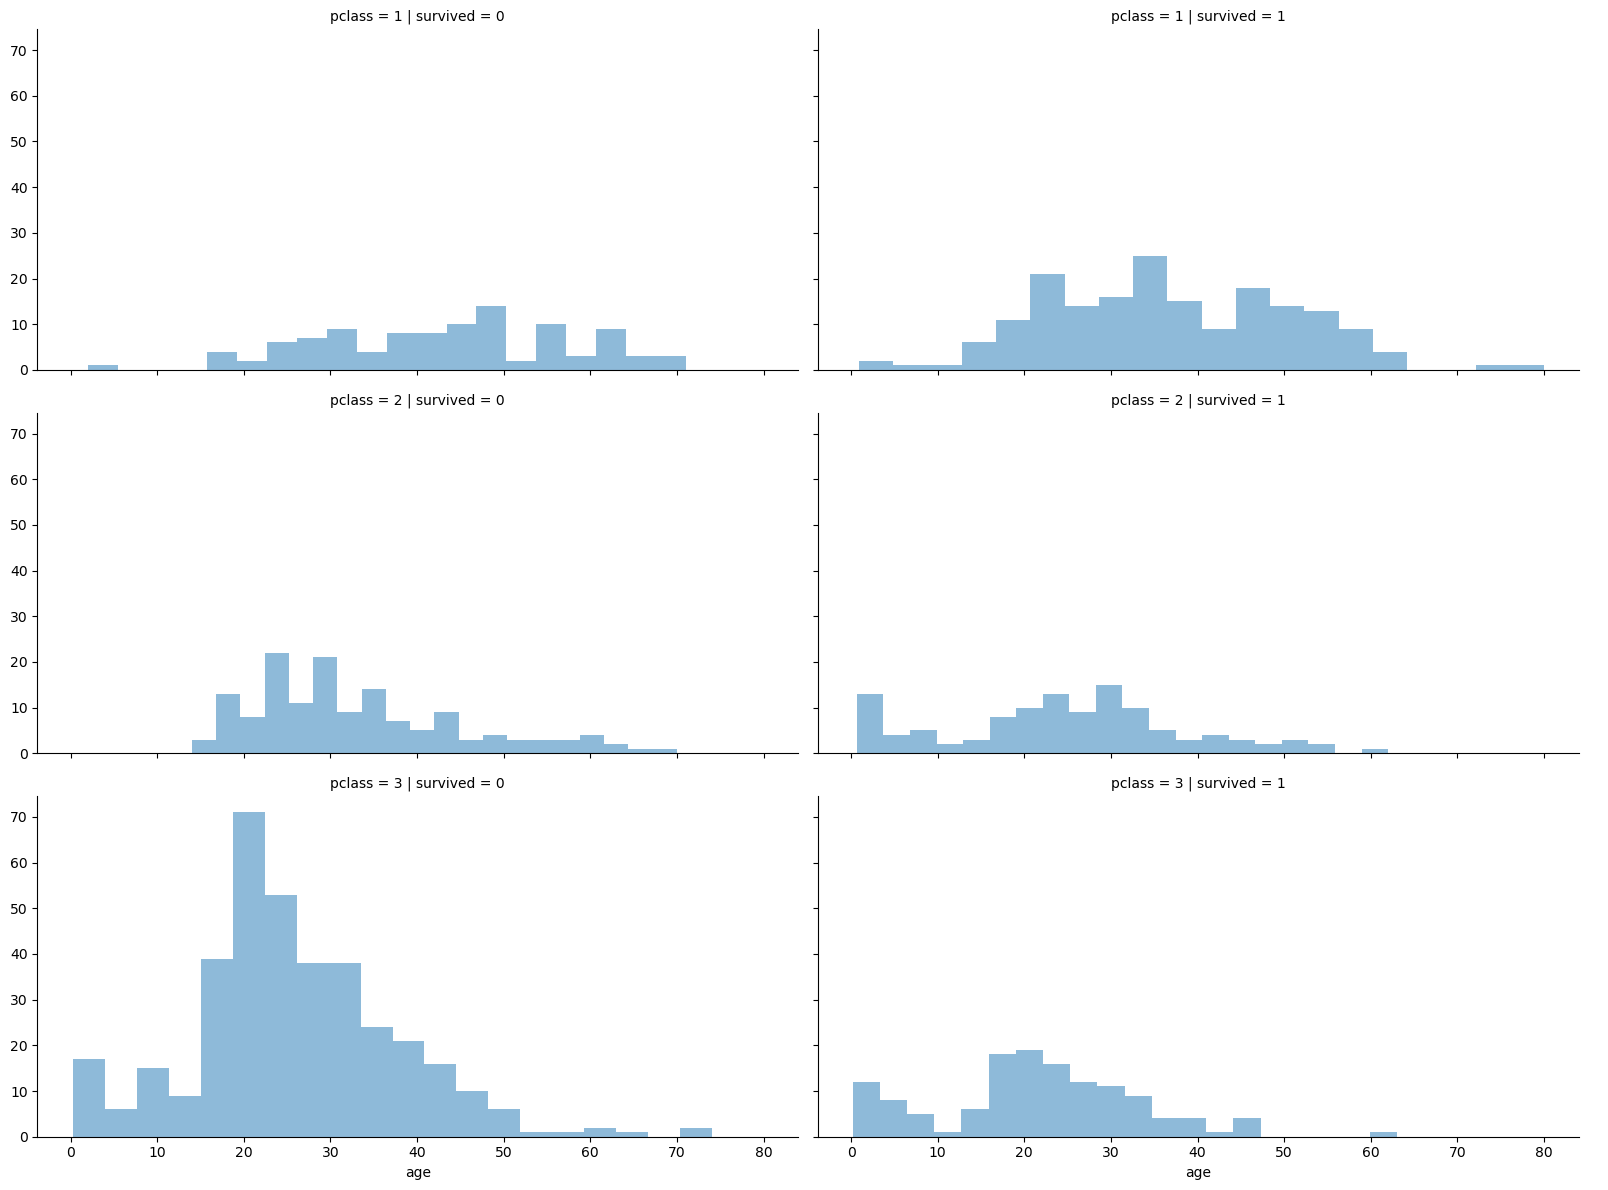

In [32]:
grid = sns.FacetGrid(titanic, row='pclass', col='survived', height=4, aspect=2)
grid.map(plt.hist, 'age', alpha=0.5, bins=20) #--> 나이별 히스토그램을 맵핑
grid.add_legend();

👉 선실 등급이 높으면 생존률이 높다.

- 2등실의 0세부터 12세까지의 아이들이 모두 살아 남았다.

- 3등실의 사망자 숫자가 확실이 높게 나타난다.

### 🔰 나이, 성별, 등급별 생종자 수

#### └▶ 나이를 5단계로 정리

In [33]:
titanic['age_cat'] = pd.cut(
    titanic['age'], bins=[0, 7, 15, 30, 60, 100],
    include_lowest=True, labels=['baby','teen','young','adult','old']
)
titanic

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",young
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",young
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN,teen
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN,young
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN,young


#### └▶ 그래프로 확인

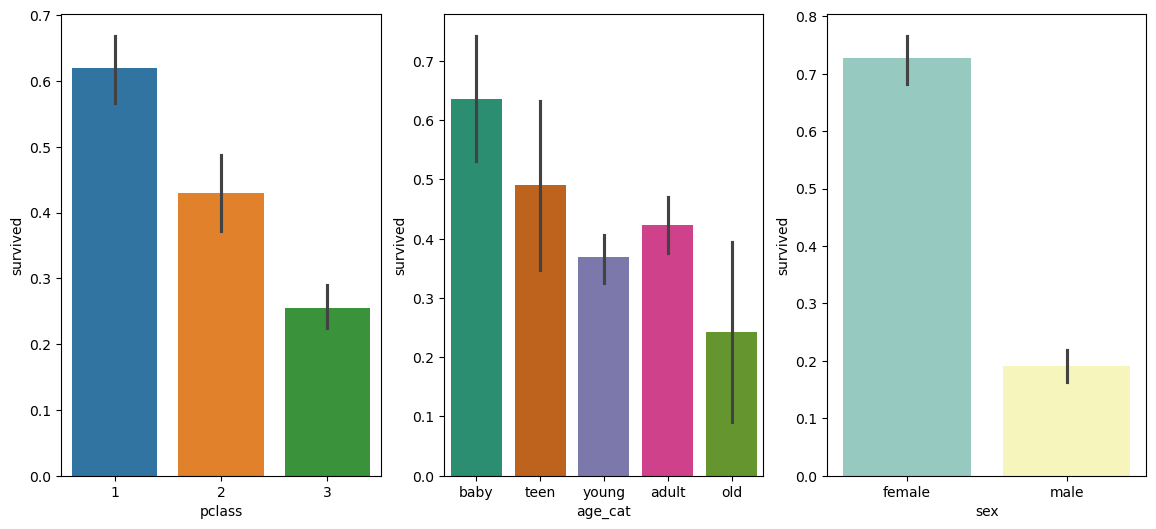

In [41]:
plt.figure(figsize=(14,6))

plt.subplot(131) #--> 1행 3열의 1st.
sns.barplot(x='pclass', y='survived', data=titanic, hue='pclass', legend=False, palette='tab10')

plt.subplot(132) #--> 1행 3열의 2nd.
sns.barplot(x='age_cat', y='survived', data=titanic, hue='age_cat', legend=False, palette='Dark2')


plt.subplot(133) #--> 1행 3열의 3rd.
sns.barplot(x='sex', y='survived', data=titanic, hue='sex', legend=False, palette='Set3')

#plt.subplots_adjust(top=1, bottom=0.1, left=0.1, right=1, hspace=0.5, wspace=0.5)
plt.show()

👉 해석

- 1등실의 생존률이 60%가 넘는 반면, 3등실은 25% 정도 된다.

- 여성의 생존률이 70%가 넘는 반면, 남성의 생존률은 20%도 되지 않는다.

- 'baby(0~6)' 나이의 생존률이 높다.

- 가난한 20대 후반 남성이라면 생존 확률이 매우 낮다.

➡ 어리고, 여성이고, 1등실일 수록 생존하기 유리했을까?

### 🔰 남/여 나이별 생존 상황

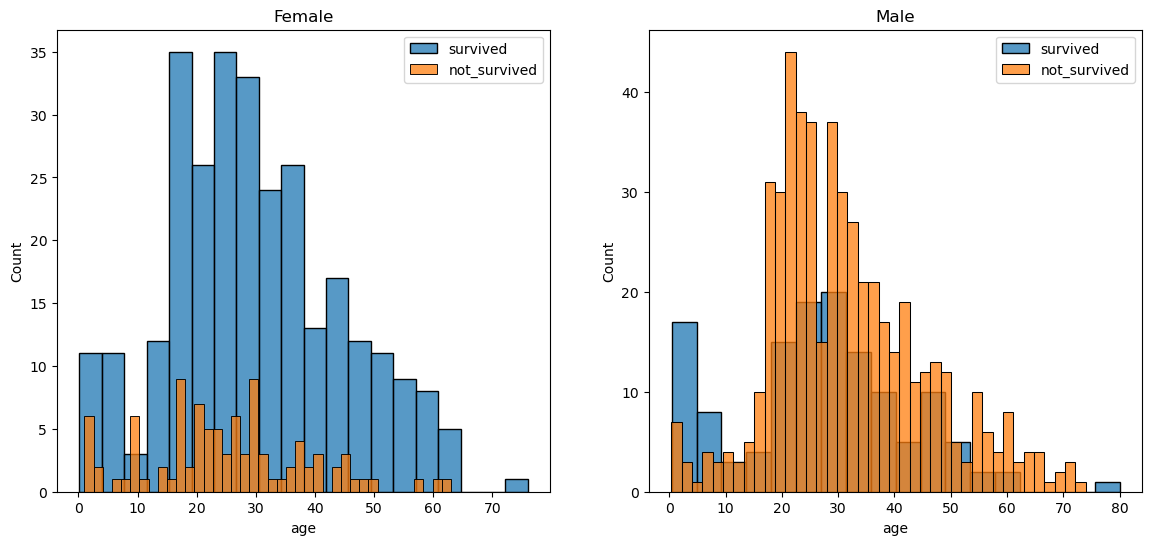

In [50]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,6))

women = titanic[titanic['sex']=='female']
men = titanic[titanic['sex']=='male']

ax = sns.histplot(
	women[women['survived']==1]['age'], bins=20, label='survived', ax=axes[0], kde=False
)
ax = sns.histplot(
	women[women['survived']==0]['age'], bins=40, label='not_survived', ax=axes[0], kde=False
)
ax.legend(); ax.set_title('Female');

ax = sns.histplot(
	men[men['survived']==1]['age'], bins=18, label='survived', ax=axes[1], kde=False
)
ax = sns.histplot(
	men[men['survived']==0]['age'], bins=40, label='not_survived', ax=axes[1], kde=False
)
ax.legend(); ax.set_title('Male');


### 🔰 사회적 신분 데이터 추출

- 탑승객의 이름에서 신분을 알 수 있다.

In [51]:
for idx, dataset in titanic.iterrows():
    print(dataset['name'])

Allen, Miss. Elisabeth Walton
Allison, Master. Hudson Trevor
Allison, Miss. Helen Loraine
Allison, Mr. Hudson Joshua Creighton
Allison, Mrs. Hudson J C (Bessie Waldo Daniels)
Anderson, Mr. Harry
Andrews, Miss. Kornelia Theodosia
Andrews, Mr. Thomas Jr
Appleton, Mrs. Edward Dale (Charlotte Lamson)
Artagaveytia, Mr. Ramon
Astor, Col. John Jacob
Astor, Mrs. John Jacob (Madeleine Talmadge Force)
Aubart, Mme. Leontine Pauline
Barber, Miss. Ellen "Nellie"
Barkworth, Mr. Algernon Henry Wilson
Baumann, Mr. John D
Baxter, Mr. Quigg Edmond
Baxter, Mrs. James (Helene DeLaudeniere Chaput)
Bazzani, Miss. Albina
Beattie, Mr. Thomson
Beckwith, Mr. Richard Leonard
Beckwith, Mrs. Richard Leonard (Sallie Monypeny)
Behr, Mr. Karl Howell
Bidois, Miss. Rosalie
Bird, Miss. Ellen
Birnbaum, Mr. Jakob
Bishop, Mr. Dickinson H
Bishop, Mrs. Dickinson H (Helen Walton)
Bissette, Miss. Amelia
Bjornstrom-Steffansson, Mr. Mauritz Hakan
Blackwell, Mr. Stephen Weart
Blank, Mr. Henry
Bonnell, Miss. Caroline
Bonnell, Miss

In [52]:
import re

for idx, dataset in titanic.iterrows():
    tmp = dataset['name']
    print(re.search('\,\s\w+(\s\w+)?\.', tmp).group())

, Miss.
, Master.
, Miss.
, Mr.
, Mrs.
, Mr.
, Miss.
, Mr.
, Mrs.
, Mr.
, Col.
, Mrs.
, Mme.
, Miss.
, Mr.
, Mr.
, Mr.
, Mrs.
, Miss.
, Mr.
, Mr.
, Mrs.
, Mr.
, Miss.
, Miss.
, Mr.
, Mr.
, Mrs.
, Miss.
, Mr.
, Mr.
, Mr.
, Miss.
, Miss.
, Mr.
, Miss.
, Miss.
, Mr.
, Mr.
, Mr.
, Dr.
, Mrs.
, Mrs.
, Mrs.
, Miss.
, Major.
, Mr.
, Mr.
, Mrs.
, Mr.
, Mrs.
, Mr.
, Mr.
, Mr.
, Master.
, Miss.
, Mr.
, Mrs.
, Mr.
, Mrs.
, Mr.
, Mrs.
, Mr.
, Mrs.
, Mr.
, Mrs.
, Miss.
, Miss.
, Mr.
, Mrs.
, Mr.
, Mr.
, Mrs.
, Miss.
, Mr.
, Mr.
, Miss.
, Mr.
, Mrs.
, Mrs.
, Mr.
, Capt.
, Miss.
, Mrs.
, Mr.
, Mrs.
, Mr.
, Mr.
, Miss.
, Mr.
, Mrs.
, Mr.
, Mrs.
, Dr.
, Master.
, Mrs.
, Mr.
, Mrs.
, Mrs.
, Lady.
, Sir.
, Mr.
, Mrs.
, Miss.
, Miss.
, Miss.
, Mr.
, Mrs.
, Miss.
, Mr.
, Mr.
, Miss.
, Miss.
, Miss.
, Mr.
, Mr.
, Mrs.
, Miss.
, Mr.
, Dr.
, Mr.
, Mrs.
, Miss.
, Mr.
, Mrs.
, Mr.
, Mr.
, Mrs.
, Mr.
, Miss.
, Miss.
, Mrs.
, Mr.
, Mr.
, Mrs.
, Mr.
, Col.
, Miss.
, Mr.
, Mrs.
, Mr.
, Mrs.
, Mr.
, Mr.
, Mrs.
, Mr.

In [54]:
import re

title = []
for idx, dataset in titanic.iterrows():
    tmp = dataset['name']
    title.append(re.search('\,\s\w+(\s\w+)?\.', tmp).group()[2:-1])

title

['Miss',
 'Master',
 'Miss',
 'Mr',
 'Mrs',
 'Mr',
 'Miss',
 'Mr',
 'Mrs',
 'Mr',
 'Col',
 'Mrs',
 'Mme',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Mrs',
 'Miss',
 'Mr',
 'Mr',
 'Mrs',
 'Mr',
 'Miss',
 'Miss',
 'Mr',
 'Mr',
 'Mrs',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Miss',
 'Miss',
 'Mr',
 'Miss',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Dr',
 'Mrs',
 'Mrs',
 'Mrs',
 'Miss',
 'Major',
 'Mr',
 'Mr',
 'Mrs',
 'Mr',
 'Mrs',
 'Mr',
 'Mr',
 'Mr',
 'Master',
 'Miss',
 'Mr',
 'Mrs',
 'Mr',
 'Mrs',
 'Mr',
 'Mrs',
 'Mr',
 'Mrs',
 'Mr',
 'Mrs',
 'Miss',
 'Miss',
 'Mr',
 'Mrs',
 'Mr',
 'Mr',
 'Mrs',
 'Miss',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Mrs',
 'Mrs',
 'Mr',
 'Capt',
 'Miss',
 'Mrs',
 'Mr',
 'Mrs',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Mrs',
 'Mr',
 'Mrs',
 'Dr',
 'Master',
 'Mrs',
 'Mr',
 'Mrs',
 'Mrs',
 'Lady',
 'Sir',
 'Mr',
 'Mrs',
 'Miss',
 'Miss',
 'Miss',
 'Mr',
 'Mrs',
 'Miss',
 'Mr',
 'Mr',
 'Miss',
 'Miss',
 'Miss',
 'Mr',
 'Mr',
 'Mrs',
 'Miss',
 'Mr',
 'Dr',
 'Mr',
 'Mrs',
 'Miss',
 'Mr',
 'Mrs',
 'Mr',
 'Mr',

In [55]:
import re

title = []
for idx, dataset in titanic.iterrows():
    tmp = dataset['name']
    title.append(re.search('\,\s\w+(\s\w+)?\.', tmp).group()[2:-1])

titanic['title'] = title
titanic

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat,title
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young,Miss
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby,Master
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby,Miss
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",young,Mr
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",young,Mrs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN,teen,Miss
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN,NaN,Miss
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN,young,Mr
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN,young,Mr


### 🔰 신분 별 생존률

In [56]:
pd.crosstab(titanic['title'], titanic['sex']) #--> 성별로 본 귀족

sex,female,male
title,,
Capt,0,1
Col,0,4
Don,0,1
Dona,1,0
Dr,1,7
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,61


In [57]:
titanic['title'].unique()

array(['Miss', 'Master', 'Mr', 'Mrs', 'Col', 'Mme', 'Dr', 'Major', 'Capt',
       'Lady', 'Sir', 'Mlle', 'Dona', 'Jonkheer', 'the Countess', 'Don',
       'Rev', 'Ms'], dtype=object)

In [58]:
titanic['title'] = titanic['title'].replace('Mlle', 'Miss')
titanic['title'] = titanic['title'].replace('Ms', 'Miss')
titanic['title'] = titanic['title'].replace('Mme', 'Mrs')

Rare_f = ['Dona', 'Lady', 'the Countess'] #--> 여성 귀족 신분명
Rare_m = ['Capt', 'Col', 'Don', 'Major', 'Rev', 'Sir', 'Dr', 'Master', 'Jonkheer'] #--> 남성 귀족 신분명

for each in Rare_f:
    titanic['title'] = titanic['title'].replace(each, 'Rare_f')

for each in Rare_m:
    titanic['title'] = titanic['title'].replace(each, 'Rare_m')

titanic['title'].unique()

array(['Miss', 'Rare_m', 'Mr', 'Mrs', 'Rare_f'], dtype=object)

In [59]:
titanic[['title', 'survived']].groupby(['title'], as_index=False).mean()

,title,survived
0,Miss,0.678030
1,Mr,0.162483
2,Mrs,0.787879
3,Rare_f,1.000000
4,Rare_m,0.448276


👉 해석

- 평민 남성(Mr)의 생존률이 가장 낮다.

- 그 다음은 귀족 남성(Rare_m) --> 평민 여성(Miss, Mrs) --> 귀족 여성(Rare_f)의 생존률이 가장 높다.

- 귀족이라고 생존률이 높은 것은 아니다. 귀족 남성의 경우 절반도 살아남지 못했다.

## ⏹ 머신러닝을 이용한 생존자 예측

In [60]:
# 간단한 구조 확인

titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1309 non-null   int64   
 1   survived   1309 non-null   int64   
 2   name       1309 non-null   object  
 3   sex        1309 non-null   object  
 4   age        1046 non-null   float64 
 5   sibsp      1309 non-null   int64   
 6   parch      1309 non-null   int64   
 7   ticket     1309 non-null   object  
 8   fare       1308 non-null   float64 
 9   cabin      295 non-null    object  
 10  embarked   1307 non-null   object  
 11  boat       486 non-null    object  
 12  body       121 non-null    float64 
 13  home.dest  745 non-null    object  
 14  age_cat    1046 non-null   category
 15  title      1309 non-null   object  
dtypes: category(1), float64(3), int64(4), object(8)
memory usage: 155.0+ KB


In [61]:
# 머신러닝을 위해 'sex' 컬럼을 숫자로 변경한다.

titanic['sex'].unique()

array(['female', 'male'], dtype=object)

🚩 `LabelEncoder`

- Label Encode를 활용하면 해당 컬럼을 쉽게 숫자형으로 변환할 수 있다.

In [62]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(titanic['sex'])

titanic['gender'] = le.transform(titanic['sex'])
titanic

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat,title,gender
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young,Miss,0
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby,Rare_m,1
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby,Miss,0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",young,Mr,1
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",young,Mrs,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN,teen,Miss,0
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN,NaN,Miss,0
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN,young,Mr,1
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN,young,Mr,1


In [63]:
# 결측치는 어쩔 수 없이 포기한다.

titanic = titanic[titanic['age'].notnull()]
titanic = titanic[titanic['fare'].notnull()]
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1045 entries, 0 to 1308
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1045 non-null   int64   
 1   survived   1045 non-null   int64   
 2   name       1045 non-null   object  
 3   sex        1045 non-null   object  
 4   age        1045 non-null   float64 
 5   sibsp      1045 non-null   int64   
 6   parch      1045 non-null   int64   
 7   ticket     1045 non-null   object  
 8   fare       1045 non-null   float64 
 9   cabin      272 non-null    object  
 10  embarked   1043 non-null   object  
 11  boat       417 non-null    object  
 12  body       119 non-null    float64 
 13  home.dest  685 non-null    object  
 14  age_cat    1045 non-null   category
 15  title      1045 non-null   object  
 16  gender     1045 non-null   int32   
dtypes: category(1), float64(3), int32(1), int64(4), object(8)
memory usage: 135.9+ KB


### 🔰 상관관계

- 상관계수로 무엇이 생존에 영향을 주는지 확인한다.

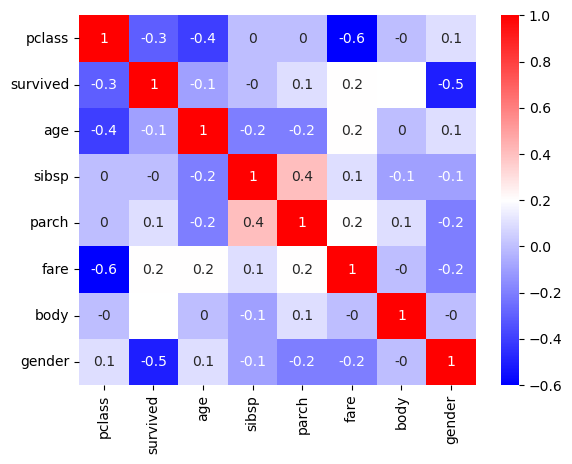

In [67]:
correlation_matirx = titanic[['pclass','survived','age','sibsp','parch','fare','body','gender']].corr().round(1)
sns.heatmap(data=correlation_matirx, annot=True, cmap='bwr');

### 🔰 데이터 분리

- 먼저 특성을 선택하고 데이터를 훈련용와 테스트용으로 나눈다.

- 특성은 pclass, age, sibsp, parch, fare, gender로 선정한다.

In [69]:
from sklearn.model_selection import train_test_split

X = titanic[['pclass','age','sibsp','parch','fare','gender']]
y = titanic['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13) #--> random_state는 아무 숫자를 지정해도 상관없다.

### 🔰 Decision Tree Model

- 우선 결정 트리 모델로 만들어 본다.

In [70]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=4, random_state=13)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=13)

In [71]:
from sklearn.metrics import accuracy_score

pred = dt.predict(X_test)
accuracy_score(y_test, pred)

0.7655502392344498

### 🔰 디카프리오의 생존율은?

- 먼저 디카프리오라는 인물의 feature를 특정지어야 한다.

- 내가 특정한 데이터의 특성에 맞춰 디카프리오의 특성을 채운다.

	- 'pclass' : 3등실에 탔을 것이고,
	- 'age' : 18세라고 영화에 나옴.
	- 'sibsp' : 형제자매나 배우자는 없없다.
	- 'parch' : 부모나 자녀도 없었다.
	- 'fare' : 요금은 5달러 정도
	- 'gender' : 성별은 남성!

In [74]:
import numpy as np

dicaprio = np.array([[3, 18, 0, 0, 5, 1]])
print(dt.predict_proba(dicaprio)) #--> [[생존하지 못할 확률, 생존할 확률]] --> [0][1]이 생존할 확률이다.
print("Dicaprio의 생존률 예측 : ", dt.predict_proba(dicaprio)[0,1]) #--> 랜덤성 때문에 할 때마다 다르다.

[[0.83271375 0.16728625]]
Dicaprio의 생존률 예측 :  0.16728624535315986


In [75]:
# 그럼 윈슬릿의 생존률은???

winslet = np.array([[1, 16, 1, 1, 100, 0]])
print(dt.predict_proba(winslet))
print("winslet의 생존률 예측 : ", dt.predict_proba(winslet)[0,1])

[[0. 1.]]
Dicaprio의 생존률 예측 :  1.0


## ❇ 데이터 과학

![나이팅케일](https://github.com/ElaYJ/supplement/assets/153154981/b4325a76-78de-4c13-b436-c10cf6068694)

![나폴레옹의행진](https://github.com/ElaYJ/supplement/assets/153154981/331e095c-b4c7-48a1-a465-3caeb74b58d8)